# Load Datasets

#### This data set contains 3 packets from every flow in the original data set, with a label on each row

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\hind.makarem\Desktop\Server files\Test_folders\N_pacekt_files\Nmax_packet_3.csv")

Delete port numbers from features

In [2]:
b=['udp.srcport','udp.dstport','tcp.dstport','tcp.srcport',]

for n in range(1,4):
    for i in b:
        a=i+str(n)
        del df[a]

In [3]:
del df['Unnamed: 0']

In [4]:
df

,ip.flags1,ip.ttl1,ip.proto1,ip.checksum1,udp.length1,udp.checksum1,udp.time_relative1,udp.time_delta1,frame.number1,ip.len2,...,ip.flags3,ip.ttl3,ip.proto3,ip.checksum3,udp.length3,udp.checksum3,udp.time_relative3,udp.time_delta3,frame.number3,Label
0,0.535101,-1.196927,-1.495122,0.465960,0.071326,-0.976813,-0.219158,-0.106434,-0.505705,-0.418538,...,0.925017,-0.674242,-0.440325,0.844681,-0.457740,-0.709847,-0.563181,-0.038469,-0.393290,Malicious C&C
1,0.535101,-1.196927,-1.495122,-1.499103,0.071326,-0.976813,-0.219158,-0.106434,-0.505686,-0.418538,...,0.925017,-0.674242,-0.440325,-0.779495,-0.457740,-0.709847,-0.563181,-0.038469,-0.393252,Malicious C&C
2,0.535101,-1.196927,-1.495122,-1.466063,0.071326,-0.976813,-0.219158,-0.106434,-0.505667,-0.418538,...,0.925017,-0.674242,-0.440325,-0.752186,-0.457740,-0.709847,-0.563181,-0.038469,-0.393214,Malicious C&C
3,0.535101,-1.196927,-1.495122,-1.670508,0.071326,-0.976813,-0.219158,-0.106434,-0.505705,-0.418538,...,0.925017,-0.674242,-0.440325,-0.921165,-0.457740,-0.709847,-0.563181,-0.038469,-0.393290,Malicious C&C
4,0.535101,-1.196927,0.668842,1.327848,-1.191617,1.210572,-0.219158,-0.106434,13.163456,-0.553660,...,-1.081062,-1.221092,-1.244482,-1.149058,-0.660498,-0.709847,-0.566834,-0.038469,-0.393309,Malicious C&C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634220,0.535101,-1.196927,0.668842,1.439304,-0.996065,2.106035,2.602882,0.138355,2.592271,-0.553660,...,-1.081062,-1.221092,-1.244482,-1.149058,-0.660498,-0.709847,-0.566834,-0.038469,-0.393309,benign
634221,0.535101,0.834947,0.668842,-0.882324,0.098307,-0.140181,-0.516522,-0.106435,-0.490577,-0.553660,...,0.925017,0.957763,1.033964,-0.269910,0.523464,0.494965,0.107035,-0.038403,-0.363773,benign
634222,0.535101,0.834947,0.668842,-0.449780,0.071326,-0.705188,0.032741,-0.106436,-0.462121,-0.553660,...,0.925017,0.957763,1.033964,0.087399,0.523464,0.494965,1.348770,-0.038403,-0.308239,benign
634223,0.535101,-1.196927,0.668842,-1.249583,-0.996065,1.252449,-0.641490,1.222027,-0.483092,-0.553660,...,0.139489,-0.888374,0.141783,0.176130,-0.537135,0.468481,-0.337295,0.170830,-0.367182,benign


Class=0, n=31612 (4.984%)
Class=5, n=402076 (63.396%)
Class=2, n=149734 (23.609%)
Class=1, n=5000 (0.788%)
Class=3, n=34061 (5.370%)
Class=4, n=11742 (1.851%)


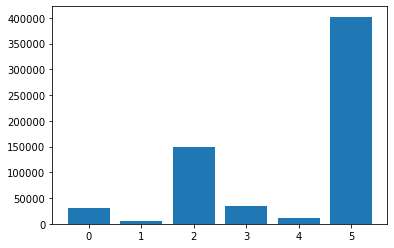

In [5]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

data = df.values

# split into input and output elements
X, y = data[:, :-1], data[:, -1]

# label encode the target variable
y = LabelEncoder().fit_transform(y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [6]:
dummies = pd.get_dummies(y) # Classification
y2 = dummies.values

# Random Forest classifier

In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
 
# Create training/ test data split
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=1, stratify=y)

# Create an instance of Random Forest Classifier
forest = RandomForestClassifier()

# Fit the model
forest.fit(X_train, y_train)
 
# Measure model performance
y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.986


# Evaluating Model:
    The Confusion Matrix, Accuracy, Precision, and Recall

In [8]:
from sklearn import metrics
import numpy as np

pred = np.argmax(y_pred,axis=1) 
# raw probabilities to chosen class (highest probability)
y_compare = np.argmax(y_test,axis=1) 
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score*100))

Accuracy score: 98.7275842495848


In [9]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_compare, pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.84445476 0.97562674 1.         0.99990214 0.88470209 0.99707043]
recall: [0.95940531 0.934      1.         1.         0.77973318 0.99037497]
fscore: [0.89826744 0.95435967 1.         0.99995107 0.82890766 0.99371142]
support: [  9484   1500  44920  10218   3523 120623]


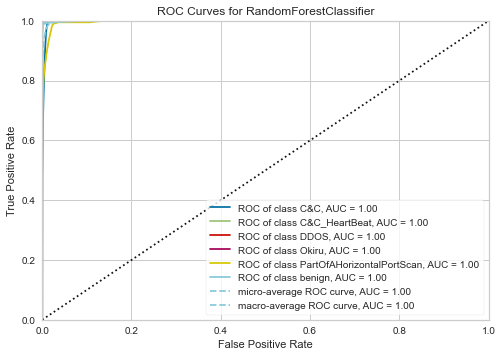

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['C&C', 'C&C_HeartBeat', 'DDOS', 'Okiru',
                'PartOfAHorizontalPortScan', 'benign'],
       estimator=RandomForestClassifier())

In [10]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Instantiate the visualizer with the classification model
model =  RandomForestClassifier()
roc_auc(model, X_train, y_train, X_test=X_test, y_test=y_test, classes=['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign'])

In [11]:
# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [12]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test)

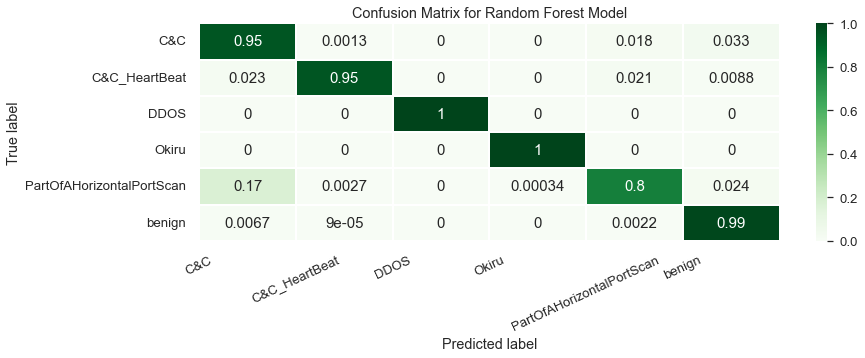

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(13,4))
sns.set(font_scale=1.2)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names =  ['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# XGBoost Classifier

In [15]:
import xgboost as xgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

model = XGBClassifier(objective='multi:softmax',num_class=6) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.66%


# Evaluating Model:
    The Confusion Matrix, Accuracy, Precision, and Recall

In [16]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, predictions)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.83043595 0.97713098 0.99996648 1.         0.89127182 0.99756697]
recall: [0.97213525 0.94662638 1.         1.         0.77729448 0.98807483]
fscore: [0.89571614 0.96163683 0.99998324 1.         0.83039033 0.99279821]
support: [ 6388   993 29830  6833  2299 80502]


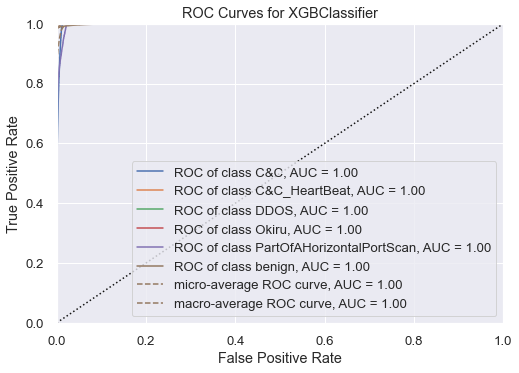

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['C&C', 'C&C_HeartBeat', 'DDOS', 'Okiru',
                'PartOfAHorizontalPortScan', 'benign'],
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, ...))

In [17]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Instantiate the visualizer with the classification model
model =  XGBClassifier()
roc_auc(model, X_train, y_train, X_test=X_test, y_test=y_test, classes=['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign'])

In [18]:
# Make predictions for the test set
y_pred_test = model.predict(X_test)

In [19]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[ 7571,     9,     0,     0,    24,   191],
       [   30,  1159,     0,     0,    45,     4],
       [    0,     0, 37383,     0,     0,     0],
       [    0,     0,     0,  8520,     0,     0],
       [  608,    14,     3,     2,  2386,    23],
       [  896,    15,     0,     0,   284, 99390]], dtype=int64)

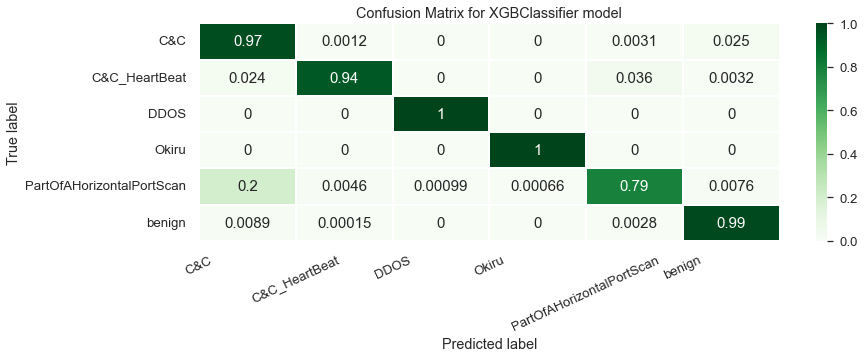

In [20]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(13,4))
sns.set(font_scale=1.2)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names =  ['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBClassifier model')
plt.show()

In [21]:
df.columns.shape[0]

30

# LSTM

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
df = df.replace(np.inf, df.median()) 
#del df['num']
df = df.fillna(df.median())
x_columns = df.columns.drop('Label')
x = df[x_columns].values
dummies = pd.get_dummies(df['Label']) # Classification
products = dummies.columns
y = dummies.values

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)
x = np.asarray(x).astype(np.float32)
y = np.asarray(y).astype(np.float32) 
X_train = X_train.reshape(-1,1,29) 
X_test= X_test.reshape(-1,1,29) 

C:\Users\hind.makarem\AppData\Local\Temp\ipykernel_19920\4289325288.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.replace(np.inf, df.median())
C:\Users\hind.makarem\AppData\Local\Temp\ipykernel_19920\4289325288.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [8]:
import tensorflow as tf

BATCH_SIZE = 20 
EPOCHS = 2 # Used less epochs for testing purposes

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(6, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()
print("Fit the model on training data")
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
print(f"History: {history.history}")
print("Evaluating on test data")
results = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print("test loss, test acc:", results)

import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test, steps=len(X_test), verbose=0)
print('Model predictions', predictions)
prediction_class = tf.argmax(predictions, axis=1)
print('Class of predictions', prediction_class)
most_frequent = np.bincount(prediction_class).argmax()
print('Most frequent class: ', most_frequent)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               52000     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 62,706
Trainable params: 62,706
Non-trainable params: 0
_________________________________________________________________
Fit the model on training data
History: {'loss': [0.07573428004980087, 0.0659026950597763], 'accuracy': [0.973723292350769, 0.975257933139801]}
Evaluating on test data
7928/7928 [=====

In [9]:
import tensorflow
import chardet 
import pandas as pd
import csv
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from scipy.stats import zscore
#history = model.fit(X_train, y_train,validation_split = 0.1, epochs=50, batch_size=4)
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)
history= model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
14865/14865 - 27s - loss: 0.0621 - accuracy: 0.9765 - val_loss: 0.0582 - val_accuracy: 0.9781 - 27s/epoch - 2ms/step
Epoch 2/1000
14865/14865 - 27s - loss: 0.0607 - accuracy: 0.9769 - val_loss: 0.0553 - val_accuracy: 0.9785 - 27s/epoch - 2ms/step
Epoch 3/1000
14865/14865 - 27s - loss: 0.0598 - accuracy: 0.9773 - val_loss: 0.0561 - val_accuracy: 0.9785 - 27s/epoch - 2ms/step
Epoch 4/1000
14865/14865 - 27s - loss: 0.0592 - accuracy: 0.9777 - val_loss: 0.0543 - val_accuracy: 0.9801 - 27s/epoch - 2ms/step
Epoch 5/1000
14865/14865 - 27s - loss: 0.0585 - accuracy: 0.9779 - val_loss: 0.0534 - val_accuracy: 0.9795 - 27s/epoch - 2ms/step
Epoch 6/1000
14865/14865 - 27s - loss: 0.0579 - accuracy: 0.9779 - val_loss: 0.0528 - val_accuracy: 0.9787 - 27s/epoch - 2ms/step
Epoch 7/1000
14865/14865 - 27s - loss: 0.0575 - accuracy: 0.9782 - val_loss: 0.0560 - val_accuracy: 0.9788 - 27s/epoch - 2ms/step
Epoch 8/1000
14865/14865 - 27s - loss: 0.0574 - accuracy: 0.9781 - val_loss: 0.0531 - val_

4955/4955 [==============================] - 5s 954us/step - loss: 0.0528 - accuracy: 0.9787
Train: 0.978, Test: 0.979


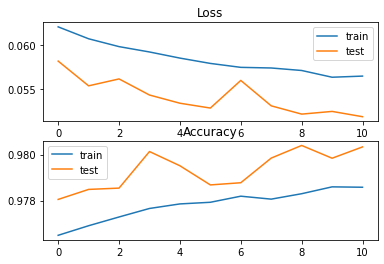

In [11]:
# multilayer perceptron model for the two circles problem
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
_, train_acc = model.evaluate(X_train, y_train, verbose=1)
_, test_acc = model.evaluate(X_test, y_test, verbose=1)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# Evaluating Deep Learning Models:
    The Confusion Matrix, Accuracy, Precision, and Recall

In [12]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

4955/4955 [==============================] - 5s 818us/step
[[ 7711    64     0     0    64     4]
 [  507   499     0     0   133    60]
 [    0     0 37376     0     0     9]
 [    0     0     0  8552     0     0]
 [  588    82     0     0  2203     1]
 [ 1434    30    20     0   384 98836]]


In [13]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.75302734 0.73925926 0.99946518 1.         0.79130747 0.99925185]
recall: [0.98316971 0.41618015 0.99975926 1.         0.76652749 0.98145059]
fscore: [0.85284521 0.53255069 0.9996122  1.         0.7787204  0.99027122]
support: [  7843   1199  37385   8552   2874 100704]


In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy : {}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report : ")
print(classification_report(y_test, y_pred, target_names=['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign']))
print("\nConfusion Matrix : ")
print(confusion_matrix(y_test, y_pred))

Test Accuracy : 0.9765131782261269

Classification Report : 
                           precision    recall  f1-score   support

                      C&C       0.79      0.92      0.85      7843
            C&C_HeartBeat       0.61      0.76      0.68      1199
                     DDOS       1.00      1.00      1.00     37385
                    Okiru       1.00      1.00      1.00      8552
PartOfAHorizontalPortScan       0.66      0.78      0.71      2874
                   benign       1.00      0.98      0.99    100704

                 accuracy                           0.98    158557
                macro avg       0.84      0.91      0.87    158557
             weighted avg       0.98      0.98      0.98    158557


Confusion Matrix : 
[[ 7222   370     1     0   249     1]
 [   78   913     0     0   188    20]
 [    0     0 37380     0     0     5]
 [    0     0     0  8552     0     0]
 [  491   124     5     0  2232    22]
 [ 1347    91    29     0   703 98534]]


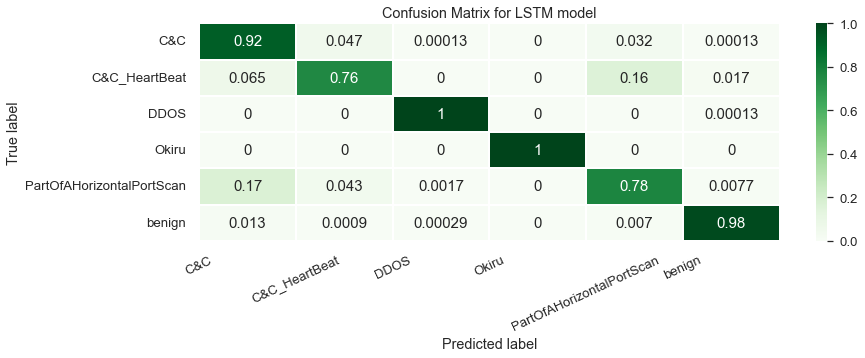

In [30]:
# Get and reshape confusion matrix data
matrix = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(13,4))
sns.set(font_scale=1.2)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names =  ['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for LSTM model')
plt.show()

In [25]:
y_pred = model.predict(X_train)
y_pred = y_pred.argmax(axis=-1)
y_train = y_train.argmax(axis=-1)

14865/14865 [==============================] - 14s 925us/step


ROC AUC score: 0.9500338232971791


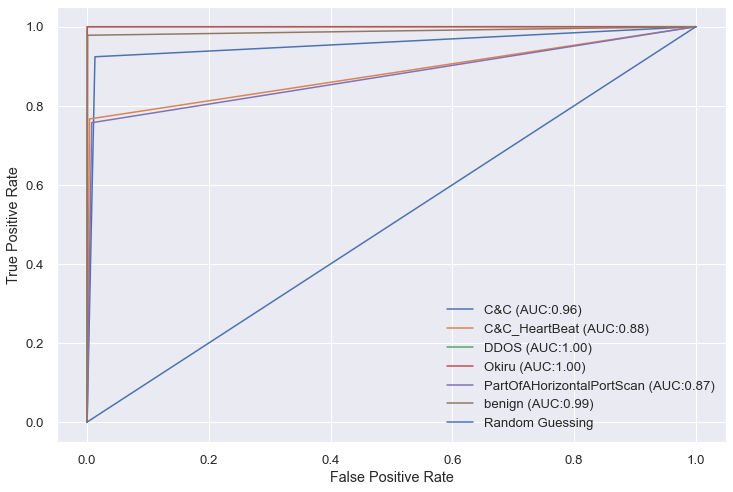

In [26]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target=  ['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx], y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_train, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

# K-Neighbors Classifier

In [31]:
from sklearn.model_selection import train_test_split#split dataset into train and test data
from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier

X_train,X_test , y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=1, stratify=y2)
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#show first 5 model predictions on the test data
knn.predict(X_test)
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.9847293941424573

# Evaluating Model:
    The Confusion Matrix, Accuracy, Precision,AUC and Recall

In [32]:
from sklearn import metrics
import numpy as np
pred = knn.predict(X_test)
pred = np.argmax(pred,axis=1) 
# raw probabilities to chosen class (highest probability)
y_compare = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score*100))

Accuracy score: 98.56438960936576


In [33]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_compare, pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.85527842 0.9137577  0.9998998  1.         0.82948892 0.99551312]
recall: [0.93278507 0.89       0.99969947 1.         0.78109029 0.99051172]
fscore: [0.89235192 0.90172239 0.99979963 1.         0.8045624  0.99300612]
support: [ 6323  1000 29947  6812  2348 80415]


In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# View confusion matrix for test data and predictions
cm=confusion_matrix(y_compare, pred)

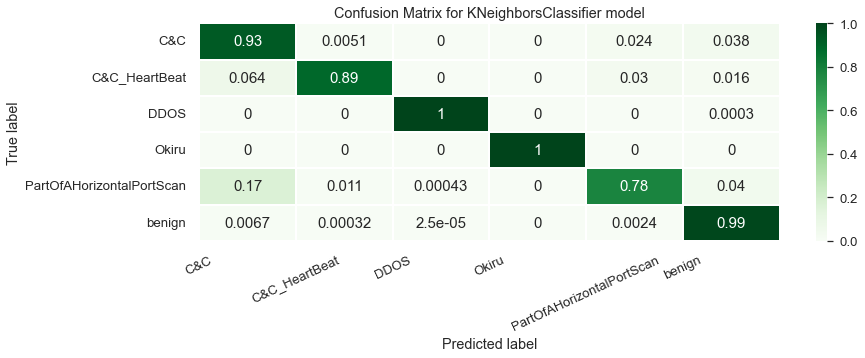

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
# Get and reshape confusion matrix data
matrix = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(13,4))
sns.set(font_scale=1.2)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names =  ['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNeighborsClassifier model')
plt.show()

In [36]:
y_pred = knn.predict(X_train)
y_pred = y_pred.argmax(axis=-1)
y_train = y_train.argmax(axis=-1)

ROC AUC score: 0.9789103057467449


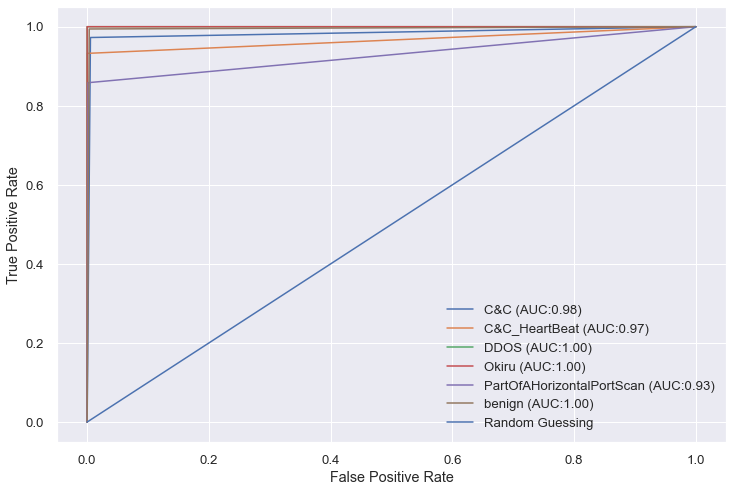

In [37]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target=  ['C&C','C&C_HeartBeat','DDOS','Okiru','PartOfAHorizontalPortScan','benign']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx], y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_train, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

# Feature Importance

Feature: 0, Score: 0.03891
Feature: 1, Score: 0.00080
Feature: 2, Score: 0.44761
Feature: 3, Score: 0.00088
Feature: 4, Score: 0.02120
Feature: 5, Score: 0.00024
Feature: 6, Score: 0.00010
Feature: 7, Score: 0.07510
Feature: 8, Score: 0.01095
Feature: 9, Score: 0.01554
Feature: 10, Score: 0.16511
Feature: 11, Score: 0.00011
Feature: 12, Score: 0.00050
Feature: 13, Score: 0.00081
Feature: 14, Score: 0.00002
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00005
Feature: 17, Score: 0.00018
Feature: 18, Score: 0.00270
Feature: 19, Score: 0.00709
Feature: 20, Score: 0.00206
Feature: 21, Score: 0.00023
Feature: 22, Score: 0.00016
Feature: 23, Score: 0.00043
Feature: 24, Score: 0.00068
Feature: 25, Score: 0.00004
Feature: 26, Score: 0.09210
Feature: 27, Score: 0.03705
Feature: 28, Score: 0.07932


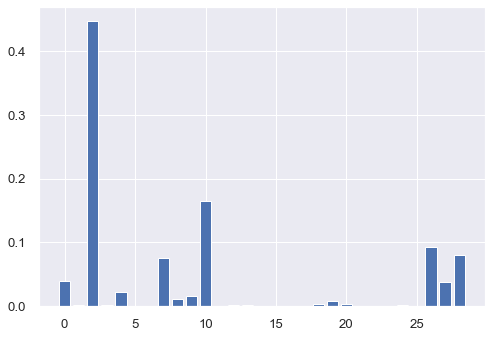

In [38]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y2)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()

In [39]:
df.columns[2]

'ip.proto1'

In [40]:
df.columns[10]

'ip.flags2'

In [41]:
df.columns[26]

'udp.time_relative3'

In [42]:
df.columns[28]

'frame.number3'

In [43]:
df.columns[7]

'udp.time_delta1'

In [44]:
df.columns[0]

'ip.flags1'

In [45]:
df.columns[27]

'udp.time_delta3'

In [2]:
df.columns[4]

'ip.checksum1'

In [3]:
df.columns[9]

'udp.time_relative1'

In [4]:
df.columns[8]

'udp.checksum1'

In [5]:
df.columns[18]

'ip.checksum2'

In [8]:
# Convert to numpy - Classification
x_columns = ['ip.proto1', 'ip.flags2', 'udp.time_relative3', 'frame.number3', 'udp.time_delta1',
       'ip.flags1', 'udp.time_delta3', 'ip.checksum1', 'udp.time_relative1', 'udp.checksum1']
x = df[x_columns].values
data = df.values
y = data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)

In [9]:
import xgboost as xgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

model = XGBClassifier(objective='multi:softmax',num_class=6) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.14%


In [10]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, predictions)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.78574128 0.82253521 0.9999328  0.98316062 0.85247525 0.99940591]
recall: [0.97651847 0.88217523 0.99758632 0.9997073  0.74902131 0.98216193]
fscore: [0.87080338 0.85131195 0.99875818 0.99136492 0.79740681 0.99070889]
support: [ 6388   993 29830  6833  2299 80502]


In [11]:
fscore

array([0.87080338, 0.85131195, 0.99875818, 0.99136492, 0.79740681,
       0.99070889])

In [13]:
Weighted_Average_f1_score=(87.08*0.0498)+(85.13*0.0079)+(99.86*0.2361)+(99.14*0.0537)+(79.74*0.0185)+(99.07*0.634)

In [14]:
Weighted_Average_f1_score

98.19544499999999